<a href="https://colab.research.google.com/github/plaban1981/Object_Detection/blob/main/Object_Detection_and_counting_objects_Using_Imageai_cvlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ImageAI 

ImageAI is a python library built to empower developers, reseachers and students to build applications and systems with self-contained Deep Learning and Computer Vision capabilities using simple and few lines of code. 

## Dependencies

* Python 3.7.6
* pip
* Tensorflow 2.4.0
* numpy==1.19.3 
* pillow==7.0.0 
* scipy==1.4.1 
* h5py==2.10.0 
* matplotlib==3.3.2 
* opencv-python 
* keras-resnet==0.2.0

## Install library

In [1]:
! pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install  imageai --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 33.2 MB/s 
     |████████████████████████████████| 26.1 MB 1.3 MB/s 
     |████████████████████████████████| 14.9 MB 31.6 MB/s 
     |████████████████████████████████| 11.6 MB 41.6 MB/s 
     |████████████████████████████████| 2.9 MB 39.5 MB/s 
     |████████████████████████████████| 2.1 MB 63.5 MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=796ead6e770aba6de59834ac306b1d25466b1c54ab622b2656c63519d3ce8cb4
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling sci

In [1]:
!wget https://vistapointe.net/images/fruit-10.jpg

--2022-10-09 13:30:08--  https://vistapointe.net/images/fruit-10.jpg
Resolving vistapointe.net (vistapointe.net)... 104.21.235.191, 104.21.235.192, 2606:4700:3038::6815:ebbf, ...
Connecting to vistapointe.net (vistapointe.net)|104.21.235.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2100714 (2.0M) [image/jpeg]
Saving to: ‘fruit-10.jpg’

fruit-10.jpg        100%[===================>]   2.00M  5.05MB/s    in 0.4s    

2022-10-09 13:30:09 (5.05 MB/s) - ‘fruit-10.jpg’ saved [2100714/2100714]



https://stackoverflow.com/questions/71900317/no-module-named-tensorflow-keras

In [7]:
pip install tensorflow==2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 19 kB/s 
     |████████████████████████████████| 463 kB 17.4 MB/s 
     |████████████████████████████████| 1.3 MB 54.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 22.9.24
    Uninstalling flatbuffers-22.9.24:
      Successfully uninstalled flatbuffers-22.9.24
  Attempting uninstall: tensorflow
    Found exis

In [1]:
import tensorflow as tf
tf.__version__

'2.7.0'

This ObjectDetection class provides you function to perform object detection on any image or set of images, using pre-trained models that was trained on the COCO dataset. 
The models supported are :
* RetinaNet, 
* YOLOv3 and 
* TinyYOLOv3. 

This means you can detect and recognize 80 different kind of common everyday objects. 

To get started, download any of the pre-trained model that you want to use via the links below.

#### To get started, download any of the pre-trained model that you want to use via the links below.

* https://github.com/OlafenwaMoses/ImageAI/releases/download/essentials-v5/resnet50_coco_best_v2.1.0.h5

* https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5

* https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo-tiny.h5/

In [12]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [14]:
!wget https://yesofcorsa.com/wp-content/uploads/2015/08/2553_fruit.jpg

--2022-10-09 14:25:41--  https://yesofcorsa.com/wp-content/uploads/2015/08/2553_fruit.jpg
Resolving yesofcorsa.com (yesofcorsa.com)... 172.67.220.205, 104.21.24.209, 2606:4700:3034::ac43:dccd, ...
Connecting to yesofcorsa.com (yesofcorsa.com)|172.67.220.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300663 (294K) [image/jpeg]
Saving to: ‘2553_fruit.jpg’

2553_fruit.jpg      100%[===================>] 293.62K  1.48MB/s    in 0.2s    

2022-10-09 14:25:42 (1.48 MB/s) - ‘2553_fruit.jpg’ saved [300663/300663]



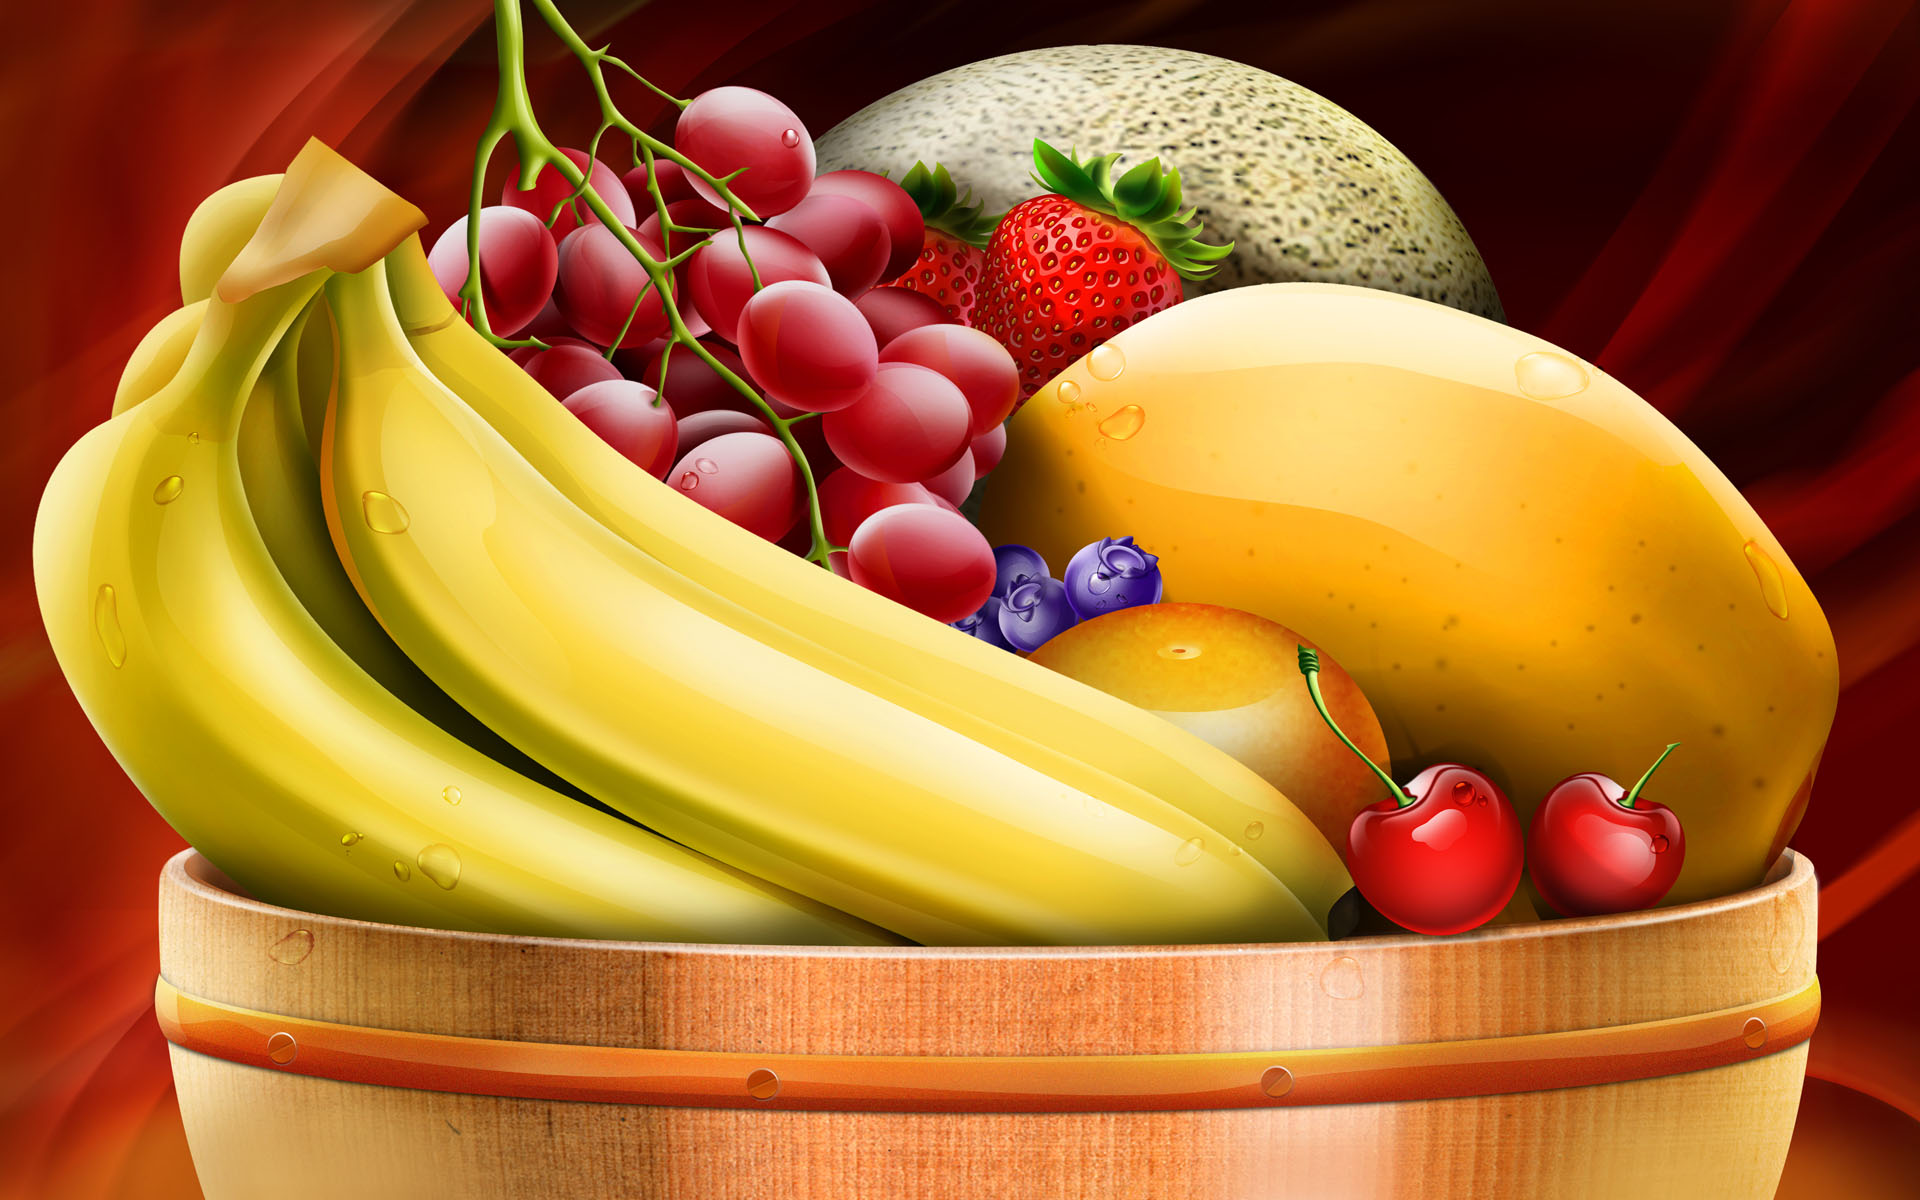

In [15]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/2553_fruit.jpg")
cv2_imshow(image)

In [21]:
from imageai.Detection import ObjectDetection
import os

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("/content/drive/MyDrive/imageai/yolo.h5")
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image="/content/2553_fruit.jpg", output_image_path= "new_cycling001.jpg", minimum_percentage_probability=30)
label = []
for eachObject in detections:
    label.append(eachObject["name"])
    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("--------------------------------")
for item in set(label):
        print(f'Number of {item} in the image is {str(label.count(item))}')

banana  :  57.220977544784546  :  [25, 220, 953, 978]
--------------------------------
bowl  :  71.7558205127716  :  [55, 92, 1888, 1188]
--------------------------------
dining table  :  49.07093644142151  :  [55, 92, 1888, 1188]
--------------------------------
banana  :  97.52199649810791  :  [969, 384, 1781, 1007]
--------------------------------
apple  :  30.487799644470215  :  [1523, 797, 1688, 952]
--------------------------------
Number of apple in the image is 1
Number of dining table in the image is 1
Number of banana in the image is 2
Number of bowl in the image is 1


##Example 2:

In [30]:
!wget https://miro.medium.com/max/1100/1*4QW4-Yz6izpbyCiZv6bSPA.jpeg

--2022-10-09 14:52:57--  https://miro.medium.com/max/1100/1*4QW4-Yz6izpbyCiZv6bSPA.jpeg
Resolving miro.medium.com (miro.medium.com)... 162.159.152.4, 162.159.153.4, 2606:4700:7::a29f:9804, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.152.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55827 (55K) [image/jpeg]
Saving to: ‘1*4QW4-Yz6izpbyCiZv6bSPA.jpeg’

1*4QW4-Yz6izpbyCiZv 100%[===================>]  54.52K  --.-KB/s    in 0.001s  

2022-10-09 14:52:57 (84.9 MB/s) - ‘1*4QW4-Yz6izpbyCiZv6bSPA.jpeg’ saved [55827/55827]



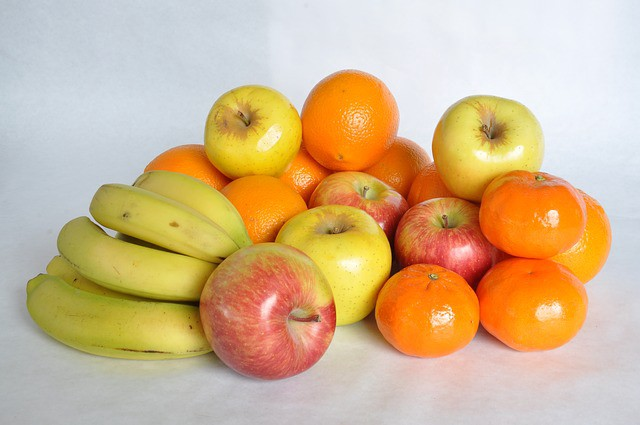

In [31]:
img_path = "/content/1*4QW4-Yz6izpbyCiZv6bSPA.jpeg"
image =cv2.imread(img_path)
cv2_imshow(image)

In [32]:
detections = detector.detectObjectsFromImage(input_image="/content/1*4QW4-Yz6izpbyCiZv6bSPA.jpeg", output_image_path= "new_cycling001.jpg", minimum_percentage_probability=30)
label = []
for eachObject in detections:
    label.append(eachObject["name"])
    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("--------------------------------")
for item in set(label):
        print(f'Number of {item} in the image is {str(label.count(item))}')

banana  :  46.37127220630646  :  [29, 189, 234, 345]
--------------------------------
dining table  :  50.59521198272705  :  [40, 121, 617, 428]
--------------------------------
apple  :  90.62881469726562  :  [202, 270, 343, 391]
--------------------------------
apple  :  93.86270642280579  :  [202, 90, 303, 199]
--------------------------------
orange  :  93.59220266342163  :  [299, 80, 402, 185]
--------------------------------
apple  :  87.20070719718933  :  [434, 110, 544, 219]
--------------------------------
apple  :  38.90117108821869  :  [142, 149, 233, 204]
--------------------------------
orange  :  33.184826374053955  :  [142, 149, 233, 204]
--------------------------------
orange  :  84.32287573814392  :  [223, 182, 308, 254]
--------------------------------
apple  :  74.15763139724731  :  [313, 182, 403, 252]
--------------------------------
orange  :  76.45361423492432  :  [480, 188, 588, 285]
--------------------------------
apple  :  84.4936728477478  :  [390, 212, 501

## Object Detection from Images and Counting Objects using cvlib

In [22]:
! pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 25.1 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046385 sha256=7d52e429b2aebe2b44c0c52fd60b0bfe0883622226c0c94df0fe7152f971e63f
  Stored in directory: /root/.cache/pip/wheels/8e/d7/31/bc643bd3a8b11a7368b1ab1d8a6299b33b462ed0b0683ddc5a
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=541c880ddac7c0d23afbabcca22947d3dc4a042b5b27f57fa57d3a3bb121b135
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


In [23]:
import cv2
import matplotlib.pyplot as plt
import cvlib
from cvlib.object_detection import draw_bbox
from google.colab.patches import cv2_imshow

def image_Object_Detection(image_file):
	# reading the image
    img = cv2.imread(image_file)
    # detect common objects
    bbox, label, conf = cvlib.detect_common_objects(img)
    # draw bbox around the objects
    output_image = draw_bbox(img, bbox, label, conf)
    # show and plot the image
    #plt.imshow(output_image)
    #plt.show()
    cv2_imshow(output_image)
	
	# print the number of different labels found in the images
    for item in set(label):
        print(f'Number of {item} in the image is {str(label.count(item))}')


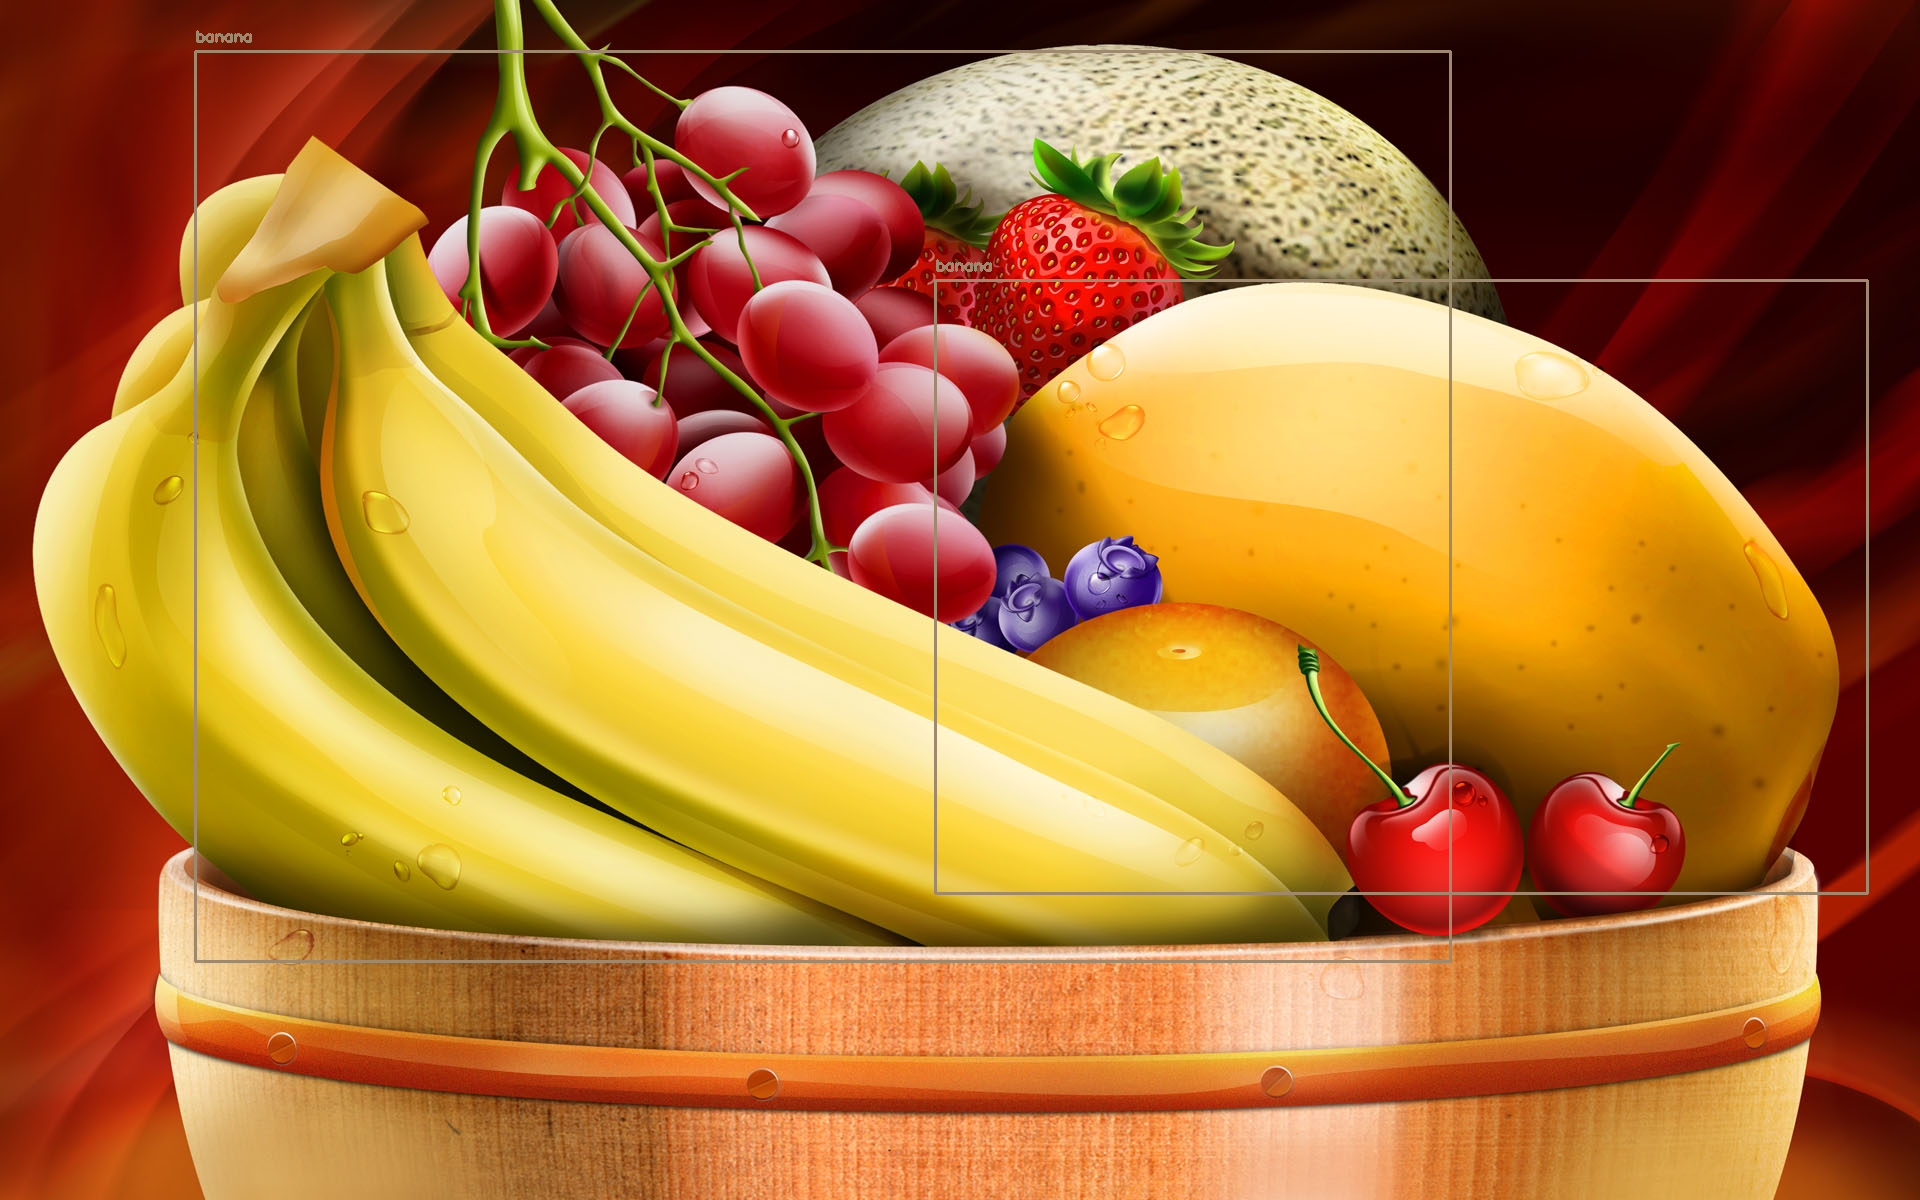

Number of banana in the image is 2


In [24]:
image = "/content/2553_fruit.jpg"
image_Object_Detection(image)

Example 2:

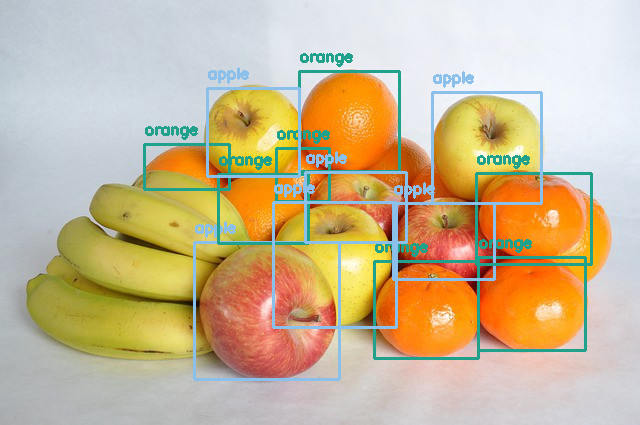

Number of apple in the image is 6
Number of orange in the image is 7


In [33]:
image = "/content/1*4QW4-Yz6izpbyCiZv6bSPA.jpeg"
image_Object_Detection(image)

## Detecting Objets from Video using Imageai

## Download Youtude video

In [34]:
#install pytube library to download youtube video
! pip install pytube -q

     |████████████████████████████████| 56 kB 3.4 MB/s 


In [1]:
# importing the module  
#https://www.youtube.com/watch?v=AT05q9wPxKs
#https://www.youtube.com/watch?v=Cdb6VwedT5w
from pytube import YouTube  
yt = YouTube('https://www.youtube.com/watch?v=Cdb6VwedT5w')  
print(yt.title)

Red and Green Traffic Signal Arrows Displayed Simultaneously -- Federal Way, WA


In [2]:
myStream = YouTube('https://www.youtube.com/watch?v=Cdb6VwedT5w').streams.first()
filename = myStream.download()
filename

'/content/Red and Green Traffic Signal Arrows Displayed Simultaneously -- Federal Way WA.3gpp'

In [ ]:
from imageai.Detection import VideoObjectDetection
import os


def forFrame(frame_number, output_array, output_count):
  print("FOR FRAME " , frame_number)
  print("Output for each object : ", output_array)
  print("Output count for unique objects : ", output_count)
  print("------------END OF A FRAME --------------")


video_detector = VideoObjectDetection()
video_detector.setModelTypeAsYOLOv3()
video_detector.setModelPath("/content/drive/MyDrive/imageai/yolo.h5")
video_detector.loadModel()


video_detector.detectObjectsFromVideo(input_file_path="/content/Red and Green Traffic Signal Arrows Displayed Simultaneously -- Federal Way WA.3gpp", 
                                      output_file_path="video_frame_analysis" ,  
                                      frames_per_second=20, 
                                      per_frame_function=forFrame,  
                                      minimum_percentage_probability=30)

FOR FRAME  1
Output for each object :  [{'name': 'car', 'percentage_probability': 99.3091881275177, 'box_points': [93, 101, 132, 125]}, {'name': 'car', 'percentage_probability': 97.36316800117493, 'box_points': [62, 96, 88, 113]}, {'name': 'traffic light', 'percentage_probability': 56.11124634742737, 'box_points': [34, 60, 38, 69]}, {'name': 'car', 'percentage_probability': 67.20529794692993, 'box_points': [82, 92, 102, 101]}]
Output count for unique objects :  {'car': 3, 'traffic light': 1}
------------END OF A FRAME --------------
FOR FRAME  2
Output for each object :  [{'name': 'car', 'percentage_probability': 99.6583640575409, 'box_points': [92, 100, 132, 126]}, {'name': 'car', 'percentage_probability': 98.74204993247986, 'box_points': [62, 97, 88, 113]}, {'name': 'traffic light', 'percentage_probability': 45.219817757606506, 'box_points': [34, 60, 38, 69]}, {'name': 'car', 'percentage_probability': 70.94097137451172, 'box_points': [80, 93, 100, 102]}]
Output count for unique objec